In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from iou import IoU

In [21]:
len(os.listdir("data/x_train"))

9674

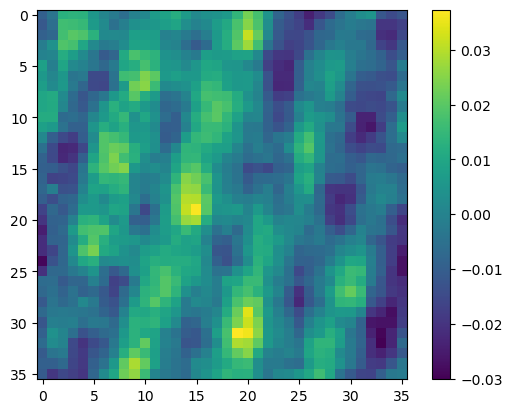

In [96]:
x0 = np.load("data/x_train/well_1_patch_165.npy")
x0 = np.nan_to_num(x0, nan =0)
plt.imshow(x0)
plt.colorbar()
plt.show()

(array([  8.,  24.,  46., 960.,  91., 108.,  41.,   5.,   4.,   9.]),
 array([-0.18734568, -0.13926782, -0.09118997, -0.0431121 ,  0.00496576,
         0.05304362,  0.10112148,  0.14919934,  0.1972772 ,  0.24535505,
         0.29343292]),
 <BarContainer object of 10 artists>)

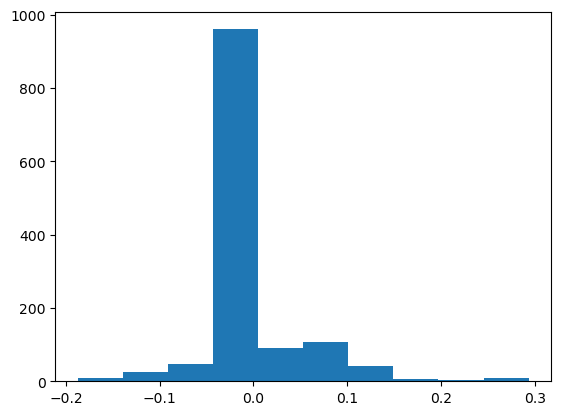

In [90]:
plt.hist(x0.flatten())

In [91]:
mean = np.mean(x0)
std = np.std(x0)
z_th = 6
outliers = np.abs(x0 - mean) > z_th * std
outliers.sum()

0

In [102]:
import numpy as np
import glob
from typing import List
from sklearn.preprocessing import RobustScaler

def preprocess(in_folder: str, out_folder: str, z_threshold: float) -> List[str]:
    """Fill nan values, removes outliers and scales data. Stacks result in a new folder.

    Args:
        in_folder (str): the folder containing unprocessed data
        out_folder (str): the folder where to save processed data
        z_threshold (float): for the outliers processing, a pixel value outside of the mean +/- z_threshold*std interval
            is considered as an outlier pixel. Each patch with an outlier pixel will be removed.
    
    Returns:
        List[str]: list of outier patches
    """

    # List of .npy files 
    file_paths = glob.glob(in_folder + '/*.npy') 

    # Initialize list of outlier patches
    outlier_patches = []

    for file_path in file_paths:
        
        # Patch name with the following pattern: "well_[i]_patch_[j]"
        name = file_path.split('\\')[-1][:-4]
        
        # Load patch
        img = np.load(file_path)
        
        # Fill nan with zeros
        img = np.nan_to_num(img, nan=0)
    
        # Compute mean and standard deviation
        mean = np.mean(img)
        std = np.std(img)
    
        # Find outlier pixels
        outliers = np.abs(img - mean) > z_threshold * std
    
        # If outlier pixels were found, add it to the list
        if outliers.any():
            outlier_patches.append(name)
        
        # Else, scale and add it to the processed data folder
        else:
            img_scaled = RobustScaler().fit_transform(img)
            np.save(out_folder + '/' + name + '.npy', img_scaled)

    # Display results
    print("Nombre de fichiers avec valeurs aberrantes :", len(outlier_patches))
    return outlier_patches

In [104]:
outlier_patches=preprocess("data/x_train", "data/proper_x_train", 6)


OSError: 1296 requested and 0 written

In [101]:
np.save('data/x0.npy', x0)

In [73]:
in_folder = "data/x_train"
file_paths = glob.glob(in_folder + '/*.npy') 
for file_path in file_paths:
        # Load patch
        array = np.load(file_path)
        if np.isnan(array).sum() > 0:
            print(file_path)

data/x_train\well_15_patch_201.npy
data/x_train\well_15_patch_202.npy


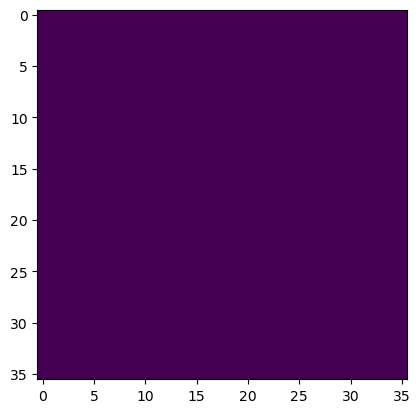

In [97]:
y_train = pd.read_csv("data/y_train.csv", index_col=0)
img = y_train.loc['well_15_patch_165'].values.reshape((36,36))

plt.imshow(img)

In [19]:
y_train

,0,1,2,3,4,5,6,7,8,9,...,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295
well_10_patch_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
well_10_patch_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
well_10_patch_10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
well_10_patch_11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
well_10_patch_12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
well_15_patch_95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
well_15_patch_96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
well_15_patch_97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
well_15_patch_98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
